#  <font color="darkred"> &#10070; Traitement de données en tables</font>

Le but de l'activité est de traiter les données `csv` téléchargées depuis [cette page](https://www.data.gouv.fr/fr/datasets/menus-des-cantines-des-colleges/) du site `data.gouv.fr`.

## <font color="darkblue"> &diams; Utiliser un tableur </font>


Pour traiter et utiliser ces données, une première idée consiste à les importer dans un **tableur**.

## <font color=green> &#9998; Exercices </font>
1.<font color=green> Lancer LibreOffice Calc puis ouvrir le fichier téléchargé à la question précédente. Une boîte de dialogue s'ouvre pour importer le fichier. Préciser bien que le séparateur de champs est le <code>;</code> et spécifier l'encodage `utf-8` comme sur la capture d'écran ci-dessous : </font>

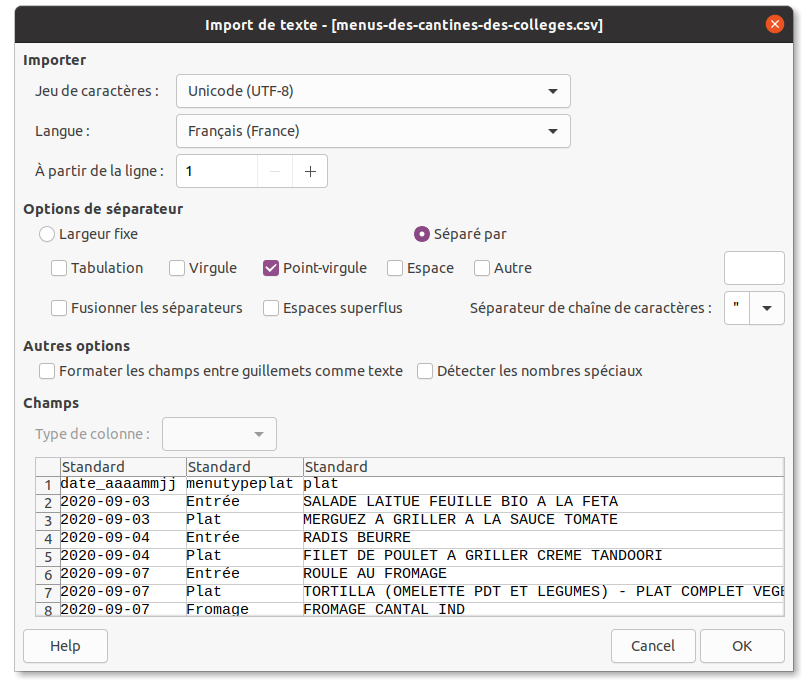

2.<font color=green> Peut-on traiter facilement ces données dans le tableur et en extraire des informations ? Par exemple, pouvez-vous facilement indiquer le nombre de fois où les repas servis contenaient du riz? </font>

*Votre réponse ici*

## <font color="darkblue"> &diams; Python à la rescousse </font>

Nous avons vu en que Python permet de lire des informations présentes dans un fichier. De plus, le module `csv` de Python permet de récupérer ces données lorsqu'elles sont au format `csv`. 


## <font color=green> &#9998; Exercices </font>
3.<font color=green> Revoir (ou chercher) comment ouvrir un fichier en Python. Ecrire ci-dessous les instructions permettant d'importer le module <code>csv</code> et d'ouvrir le fichier <code>menus-des-cantines-des-colleges.csv</code> en lecture seule sous le nom de descripteur de fichier <code>fichier_menus</code>. On précisera <code>encoding="utf-8"</code> dans l'ouverture pour éviter tout problème</font>.

In [ ]:
# Import du module csv :
import .....
# Ouverture du fichier lycee.csv avec le descripteur fichier_lycee
fichier_menus = open(.......,"...",encoding=".....")

La fonction `reader` du module  `csv` permet à présent de lire le contenu du fichier. 
Nous précisons que le caratère qui sépare les champs est le <code><font color=red>;</font></code> grâce à l'instruction `delimiter=';'` (par défaut le séparateur est la virgule)

Nous devons ensuite en faire une liste grâce à l'instruction `list`. On génère ainsi une **liste de liste**, chaque ligne du tableau correspond à une liste et dans cette liste, chaque élément est une case de la table.

In [ ]:
liste_menus = list(csv.reader(fichier_menus,delimiter=';'))

4.<font color=green> Le fichier a été lu, taper l'instruction Python permettant de le refermer</font>.

In [ ]:
# Fermeture du fichier
fichier_menus......()

Observons maintenant comment est structuré notre **liste de liste**, il serait dangereux de l'afficher en entier, en effet, rappellons que le fichier est volumineux (plus de 1400 lignes).
On commence donc d'abord par en afficher la  première liste

In [ ]:
print(liste_menus[0])

On constate que comme prévu, la première ligne contient les titres des colonnes

Affichons maintenant une ligne au hasard, par exemple celle d'indice 100 :

In [ ]:
print(liste_menus[100])

Cette nouvelle représentation des données va nous permettre  de répondre à la question ci-dessus difficile avec un tableur : **combien de fois les repas servis contenaient-ils du riz** ? En effet, il nous suffit :
1. de parcourir la liste `liste_menus`
2. d'incrémenter un compteur à chaque fois que le plat contient le mot "riz"

In [ ]:
compte_riz = 0
for menu in liste_menus:
    if "RIZ" in menu[2]:
        compte_riz+=1
print("Nombre de plats contenant du riz :",compte_riz)

## <font color=green> &#9998; Exercices </font>
5.<font color=green> En vous inspirant de l'exemple donné ci-dessus, rechercher le nombre de fois où de la laitue a été proposée en entrée.
</font>.

In [ ]:
# Votre programme ici


6. <font color="green">Le rougail saucisse a-t-il été servi dans cette cantine, si oui à quelle(s) date(s) ?.</font>

In [ ]:
# Votre programme ici


7. <font color='green'> Quel est le pourcentage de plats bio servi dans cette cantine ?</font>

In [ ]:
# Votre programme ici


## <font color="darkblue"> &diams; Mieux avec les dictionnaires </font>

Remarquons qu'une liste de liste n'est pas forcément satisfaisante pour représenter nos données, en effet :
* On doit aller chercher à chaque fois à quel indice dans la liste correspond la colonne qui nous intéresse (par exemple il faut retenir ici que le nom du plat est dans la colonne numéro 2 et son type dans la colonne 1)
* La première ligne du fichier est chargée comme une ligne de données alors qu'elle est en fait la liste des champs présents dans la tables

Python offre une alternative intéressante : lire les données sous forme de dictionnaires plutôt que sous forme de liste. Les clés du dictionnaire sont alors les titres des colonnes.

In [ ]:
import csv
fichier_menus=open("menus-des-cantines-des-colleges.csv","r",encoding="utf-8")
# Lecture sous forme de dictionnaire 
dict_menus = list(csv.DictReader(fichier_menus,delimiter=';'))
fichier_menus.close()

On constate que la première ligne du fichier sert maintenant de clés pour un dictionnaire. Par exemple la première ligne de `dict_menus` devient :

In [ ]:
print(dict_menus[0])

On peut donc accéder directement aux élements sans chercher comme avant leur index par exemple le `plat` figurant sur la première ligne des données s'écrit simplement

In [ ]:
print(dict_menus[0]['plat'])

Comme pour les listes, effectuons une recherche dans ces données maintenant organisées sous forme de dictionnaires. Nous allons listés tous les plats contenant des spaghettis avec la date où ils ont été servis :

In [ ]:
for menu in dict_menus:
    if "SPAGHETTI" in menu['plat']:
        print(menu['date_aaaammjj'],menu['plat'])

## <font color=green> &#9998; Exercices </font>
8. <font color=green> Rechercher et afficher les plats servis le 18 décembre 2020</font>.

In [ ]:
# Votre réponse ici


9. <font color=green> Rechercher et afficher les desserts issus de l'agriculture biologique</font>.

In [ ]:
# Votre réponse ici
